# Q2 b) i)
Compare $V_0 = 0$ and $V_0/E_1^0=2000000$

EigenValue of V0= 0 is [  1.   4.   9.  16.  25.  36.]
EigenValue of V0/E1 = 2000000 is [  6.24965743   6.24971522  24.99863117  24.9988624   56.24692565
  56.24744613]


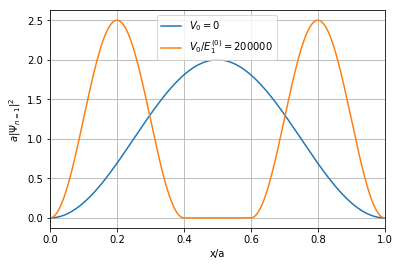

In [71]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def eigenstate(size, v):
      
    n = 0
    matrix1 = np.zeros((size, size))
    
    while n < size:   
        m = 0
        while m < size:
            if m == n:                
                elem = (n+1)**2 + v/5 + 2*v*(2/5)*np.sinc(2*(n+1)*(2/5)) 
                
                matrix1[n, m] =  elem                    
            else:
                elem1 = np.sinc(((n+1)-(m+1))*2/5)-np.sinc((n+1+m+1)*2/5)
                elem = -(2*v*2/5*(elem1)*(((-1)**(n+m+2)+1)/2))  
                matrix1[n, m] =  elem                
            m += 1
        n = n + 1
        
    eigenValues, eigenVectors = la.eig(matrix1)
    eigenValues = np.real(eigenValues)
    
    index = np.linspace(0, size, size)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    return eigenValues, eigenVectors, index

def numerical(eigenV, order):
    x = np.linspace(0, 1, 1000)
    n = 1
    psi = 0
    while n < order:
        basis = np.sqrt(2)*np.sin(n*np.pi*x)
        ci = eigenV[n-1]        
        psi = psi+ basis*ci
        n = n+1    
    return x, psi


e0, ev0, n = eigenstate(500, 0)
e200, ev200, n = eigenstate(500, 2000000)

x0, psi0 = numerical(ev0[:, 0], 500)
x, psi = numerical(ev200[:, 0], 500)
x1, psi1 = numerical(ev200[:, 1], 500)

plt.plot(x0, psi0**2, label = r'$V_0 = 0$')
plt.plot(x, psi**2, label = r'$V_0/E_{1}^{(0)} = 200000$')
plt.xlabel("x/a")
plt.ylabel(r'$a|\Psi_{n=1}|^{2}$')
plt.xlim(0, 1)
plt.legend()
plt.grid()

print('EigenValue of V0= 0 is', e0[0:6])
print('EigenValue of V0/E1 = 2000000 is', e200[0:6])


For $V_0 = 0$, the solutions energy are simply infinte square well eigenvalue. And for $V_0/E_1^0=2000000$. The gound state energy are in the ratio of $a^2/w^2 =1^2/0.4^2 = 6.25$, which agrees with analytical energy in $(a)$ . $V_0/E_1^0=2000000$ have two degeneracies with same eigenvalue.

# Q2 b) ii) 

For $V_0/E^0_1 = 500$

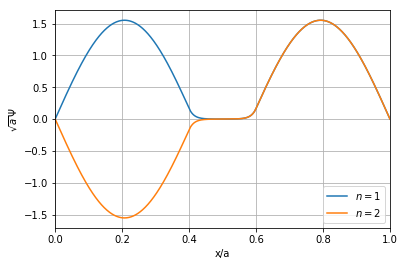

In [63]:
e500, ev500, n = eigenstate(500, 500)

x0, psi0 = numerical(ev500[:, 0], 200)
x1, psi1 = numerical(ev500[:, 1], 200)

plt.plot(x0, psi0, label = r'$n=1$')
plt.plot(x1, psi1, label = r'$n=2$')
plt.xlabel("x/a")
plt.ylabel(r'$\sqrt{a}\Psi$')
plt.xlim(0, 1)
plt.legend()
plt.grid()

$n=1$ is the even solution and $n = 2$ is the odd solution respect to center.

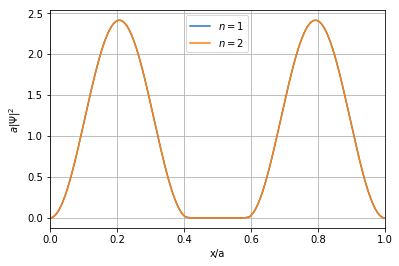

In [64]:
plt.plot(x0, psi0**2, label = r'$n=1$')
plt.plot(x1, psi1**2, label = r'$n=2$')
plt.xlabel("x/a")
plt.ylabel(r'$a|\Psi|^{2}$')
plt.xlim(0, 1)
plt.legend()
plt.grid()


The probability density functions distribute in a similar way, and the difference between them are small.